# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather'

params = {
    "q": " ",
    "appid": weather_api_key
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    params["q"]= city

    # Create endpoint URL with each city
    city_url = requests.get(url, params=params)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | dahuk
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | moindou
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | capao bonito
Processing Record 9 of Set 1 | liverpool
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | teseney
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | rio gallegos
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | urusha
Processing Record 18 of Set 1 | hambantota
Processing Record 19 of Set 1 | mangan
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | sobolevo
Processing Record 22 of Set 1 | jamestown
Proce

Processing Record 32 of Set 4 | castro
Processing Record 33 of Set 4 | cabo san lucas
Processing Record 34 of Set 4 | kang
Processing Record 35 of Set 4 | samusu
'coord'
City not found. Skipping...
Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | vidim
Processing Record 38 of Set 4 | kismayo
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | gao
Processing Record 41 of Set 4 | stankov
Processing Record 42 of Set 4 | penzance
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | neiafu
Processing Record 45 of Set 4 | labuhan
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | noyabrsk
Processing Record 48 of Set 4 | ocosingo
Processing Record 49 of Set 4 | emba
Processing Record 0 of Set 5 | jacqueville
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | tsihombe
'coord'
City not found. Skipping...
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 

Processing Record 20 of Set 8 | mount gambier
Processing Record 21 of Set 8 | ambilobe
Processing Record 22 of Set 8 | muros
Processing Record 23 of Set 8 | kitimat
Processing Record 24 of Set 8 | iqaluit
Processing Record 25 of Set 8 | maghama
'coord'
City not found. Skipping...
Processing Record 26 of Set 8 | alice springs
Processing Record 27 of Set 8 | marzuq
Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | kefamenanu
Processing Record 31 of Set 8 | jabiru
'coord'
City not found. Skipping...
Processing Record 32 of Set 8 | naze
Processing Record 33 of Set 8 | moose factory
Processing Record 34 of Set 8 | matamoros
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | qui nhon
Processing Record 37 of Set 8 | torbay
Processing Record 38 of Set 8 | kangaatsiaq
Processing Record 39 of Set 8 | aloleng
Processing Record 40 of Set 8 | alotau
'coord'
City not found. Skipping...
Processing Record 41 of Set 8 

Processing Record 3 of Set 12 | tuggurt
'coord'
City not found. Skipping...
Processing Record 4 of Set 12 | wiang sa
Processing Record 5 of Set 12 | teknaf
Processing Record 6 of Set 12 | antigonish
Processing Record 7 of Set 12 | port macquarie
Processing Record 8 of Set 12 | moengo
Processing Record 9 of Set 12 | qasigiannguit
Processing Record 10 of Set 12 | buenavista
Processing Record 11 of Set 12 | kurilsk
Processing Record 12 of Set 12 | lompoc
Processing Record 13 of Set 12 | awjilah
Processing Record 14 of Set 12 | ust-kamchatsk
'coord'
City not found. Skipping...
Processing Record 15 of Set 12 | ariquemes
Processing Record 16 of Set 12 | ipixuna
Processing Record 17 of Set 12 | mogwase
Processing Record 18 of Set 12 | tabas
Processing Record 19 of Set 12 | aberdeen
Processing Record 20 of Set 12 | carauari
Processing Record 21 of Set 12 | tabory
Processing Record 22 of Set 12 | moron
Processing Record 23 of Set 12 | marsabit
Processing Record 24 of Set 12 | road town
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.8667,121.9000,289.57,86,6,6.61,AU,1679252283
1,atuona,-9.8000,-139.0333,299.92,76,12,6.83,PF,1679252284
2,dahuk,36.8695,42.9940,282.84,84,1,1.84,IQ,1679252285
3,saskylakh,71.9167,114.0833,244.43,98,100,3.03,RU,1679252286
4,geraldton,-28.7667,114.6000,292.38,88,0,3.60,AU,1679252286


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esperance,-33.8667,121.9000,289.57,86,6,6.61,AU,1679252283
1,atuona,-9.8000,-139.0333,299.92,76,12,6.83,PF,1679252284
2,dahuk,36.8695,42.9940,282.84,84,1,1.84,IQ,1679252285
3,saskylakh,71.9167,114.0833,244.43,98,100,3.03,RU,1679252286
4,geraldton,-28.7667,114.6000,292.38,88,0,3.60,AU,1679252286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

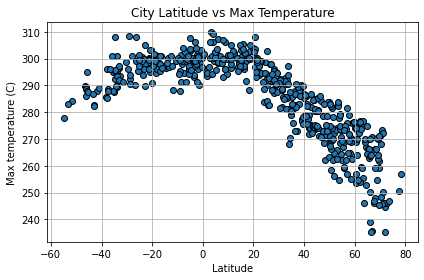

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (C)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

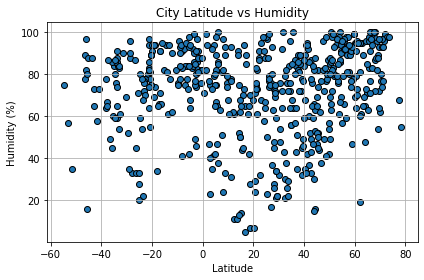

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Humidity"], edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

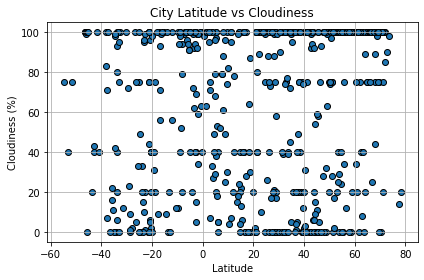

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

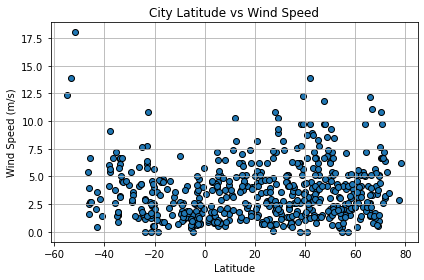

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def lingress_function:
    x = ""
    y = ""
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "r-")
    plt.show()


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,dahuk,36.8695,42.9940,282.84,84,1,1.84,IQ,1679252285
3,saskylakh,71.9167,114.0833,244.43,98,100,3.03,RU,1679252286
8,liverpool,53.4106,-2.9779,282.93,76,40,3.13,GB,1679252195
9,butaritari,3.0707,172.7902,300.07,75,71,3.79,KI,1679252289
10,teseney,15.1100,36.6575,303.28,14,22,3.95,ER,1679252290


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esperance,-33.8667,121.9000,289.57,86,6,6.61,AU,1679252283
1,atuona,-9.8000,-139.0333,299.92,76,12,6.83,PF,1679252284
4,geraldton,-28.7667,114.6000,292.38,88,0,3.60,AU,1679252286
5,moindou,-21.6924,165.6770,296.90,80,0,2.73,NC,1679252287
6,ushuaia,-54.8000,-68.3000,277.96,75,75,12.35,AR,1679252288


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE